In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
data = pd.read_csv('KIS_KIS.csv')
print('총 스팸 샘플의 수 :', len(data))

총 스팸 샘플의 수 : 122768


In [13]:
import json

with open("sample.json", 'r') as j:
  contents = json.loads(j.read())

print(len(contents['data']))
# json=pd.read_json("sample.json")
#if contents['data'][0]['body']['dialogue'][0]['participantID'] == 'P01':
#  print(contents['data'][0]['body']['dialogue'][0]['utterance'])
print(len(contents['data'][0]['body']['dialogue']))

P01 = ''
P02 = ''
ham_list = []
for j in range(len(contents['data'])):
  for i in range(len(contents['data'][j]['body']['dialogue'])):
    if contents['data'][j]['body']['dialogue'][i]['participantID'] == 'P01':
      P01 += contents['data'][j]['body']['dialogue'][i]['utterance']
      P01 += ' '
    else:
      P02 += contents['data'][j]['body']['dialogue'][i]['utterance']
      P02 += ' '
  ham_list.append(P01)
  ham_list.append(P02)
  P01 = ''
  P02 = ''

print(ham_list)

3140
24
['너~~무 앞인데 아아아아 ㅇㅇ갑자기 이해 팍 된다 확 와닿앗음 ㅠㅠㅠㅠㅠ 겉돈단 느낌 지금도 들려나 이제 대놓고 괴롭히는 좋아ㅋㅋ이없는뎅 운다 울어운다 울어근데 소외감 느꼇을만하네 #@기타# 멘탈 나갓을때니까 아무도안들어주는거같거 나도 ncs하다가 내얘기하느랔웃기다ㅋ#@기타#웃기다ㅋㅋㅋ 십어버림 ', 'ㅋㄲㅋㅋ #@이름#가 겉돈단 생각 없지않아 조금하고있어서 조금 예민할수도 너랑나처럼 #@기타#편하고 막 잘놀고그런건아니자너 그와중에 놀아달라할때 씹으믄 약간의 소외감느낄껄ㅋㅋ 근데오긴올듯 근데 헤어졌는데 너무 무시해섴ㅋ맘상했것다.. 그러게 하씨 친구랑놀다 얼핏본거여서 별거아니겠지해쏜디 ', '엄마 대단하지 않냐 아빠랑 30년동안 같이 자고 웅 ㅋㅋㅋ코 골지 잠꼬대 하지 으,,난 못해 사랑의 힘인가 그렇다 쳐도 대단쓰 ', '코 고는거 떔시? 엄마는 잠들면 안 들린대 대단혀 진짜 아니면 아예 익숙해져서 걍 무뎌진 거 아닐까 ', '#@이모티콘# 그러고보니까 이제 퇴근 30분남앗네! ㅋㅋㅋ귀여워?? 내친구가 정신없다고 쓰지마라던데 ㅋㅋㅋㅋㅋ 그래??ㅋㅋ #@이름#가 귀엽다면 된거지 머 ', '이모티콘 그거 진짜 너무 귀여운 거 아니가 이거... 완전 귀여븐데 어엉 그걸 또 잘 써서 윽시 귀엽넴ㅋㅋㅋㅋ ', '진짜 강아지 키우고싶다.. 독립생각없어? ㅜㅜㅜㅜ돈이 문제여,,,, 근데 강아지 많이많이 생각해보셔.... 내가 잠깐 데리고 있던적이 있는데 증말 상상이상이야 너무너무 이뻐죽겠고 그래서 진짜 너무 행복한데 보통은 조금 애기때 데리고 오자나 2개월이후?에 엄마강아지 젖떼고 나서 데리고오는게 가장 좋대 ', '웅웅 ㅠㅠ 아직은... 왜냐면 돈이 넘 마니들거가타... 나 진지하게 강아지 키우고싶어ㅠㅠ ㅠㅠ근데 완전 반대해,,,, 우웅 웅웅 ', '지금은 애들이 일찍자니까 전에 수업끝나고 애들보고간다고 요즘은 자기수업가기전에 애들보고싶다고 데리고 오라함 집으로 ', '고모는 왜그러세요 집도 가까운디 왜 야밤에 ㅋㅋ 세상에 ', '#@시스템#동영상# 으

In [24]:
ham = pd.DataFrame({'Text':ham_list})
ham.insert(0, 'Spam', 'ham') # Spam 구분값 추가
ham['Spam'] = ham['Spam'].replace(['ham'],[0]) # Ham 을 숫자 0 으로 교체
ham

,Spam,Text
0,0,너~~무 앞인데 아아아아 ㅇㅇ갑자기 이해 팍 된다 확 와닿앗음 ㅠㅠㅠㅠㅠ 겉돈단 느...
1,0,ㅋㄲㅋㅋ #@이름#가 겉돈단 생각 없지않아 조금하고있어서 조금 예민할수도 너랑나처럼...
2,0,"엄마 대단하지 않냐 아빠랑 30년동안 같이 자고 웅 ㅋㅋㅋ코 골지 잠꼬대 하지 으,..."
3,0,코 고는거 떔시? 엄마는 잠들면 안 들린대 대단혀 진짜 아니면 아예 익숙해져서 걍 ...
4,0,#@이모티콘# 그러고보니까 이제 퇴근 30분남앗네! ㅋㅋㅋ귀여워?? 내친구가 정신없...
...,...,...
6275,0,1시까지보자 어디서봐야하지 음 갤러리아에서보면되겠다
6276,0,뚜섬으로 와 그거 6월말까지더라 우선 뚜썸 와잇어 도서관가고픔 말하공 그려
6277,0,점심도 못 먹고 개배고픈데ㅋㅋㅋㅋ 엉 맞음 안 그래도 그거 써야함 아냐 투썸 갈게 ...
6278,0,ㅋㅋㅋㅋㅋ님 그럼 언제오는걸로 확정인뎅 ㅇㅇㅇ당근 괜찮지 담주 이번주? 아니제 담주제?


In [38]:
# data check
data[:5]

,2020,01,01.1,090100,***********,***********.1,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 박양주 올림
0,2020,1,1,90100,***********,***********,[Web발신]*庚子年*새해에도건강과 幸福한삶소망하시는일모두 이루시길빕니다.서구의원 ...
1,2020,1,1,90200,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
2,2020,1,1,90200,***********,***********,★미소 티켓★1월 재.충.전.가.능♡문의전화♡*새해복마니받으세요^^
3,2020,1,1,94500,***********,***********,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...
4,2020,1,1,94600,***********,***********,봄은 곧 다가옵니다.해처럼 밝고 모든 소망 이루시는 2020 새 해 되세요.전시의원...


In [42]:
del data['2020']
del data['01']
del data['01.1']
del data['090100']
del data['***********']
del data['***********.1'] # Text 제외 모든 값 제거
data.columns = ['Text'] # Text 의 Title 추가
data.insert(0, 'Spam', 'spam') # Spam 구분값 추가
data['Spam'] = data['Spam'].replace(['spam'],[1]) # Spam 을 숫자 1 로 교체

# Text 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['Text'], inplace=True)
print('총 샘플의 수 :', len(data))

data = data.sample(n=6279)
data[:5]

총 샘플의 수 : 12554


,Spam,Text
35797,1,제주를 지켜오신 여러분께서 김효! 도 지켜주십시요현재 경선조사 진행중!꼭 부탁드립니...
56764,1,(광고)농협캐피탈안녕하세요. 저희 [NH]와 함께하는 행복한 하루이길 바랍니다.이번...
56756,1,(광고)안녕하세요 고객님 안내드립니다.마음이 급해도 대출은 신한저축에서 안전하게!전...
40883,1,채경선입니다유나이티드제약이즈미디어자문료아끼다가놓친돈이얼마입니까..han.gl/3wrmq
115739,1,(광고)좋은 아침입니다. 오늘도 웃음이 하루 종일 넘치는 행복가득한 하루 보내세요....


In [43]:
texts = pd.concat([data, ham])
texts = texts.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset
texts

,Spam,Text
0,1,(광고) 농협캐피탈안녕하십니까제일 좋은 혜택으로 이용 가능한 상품이 개편되어 안내...
1,0,나는 오늘 스터디카페 끊을라고 ㅎ 공부 할라면 그거라도 해야겟너 ㅋㅋㅋㅋㅋ 근데 나...
2,0,어여오세요 쌤것두 있어여 어디서 간식이 자꾸 나오는겨 ㅋㅋㅋ 도라에몽이야 뭐얔ㅋㅋ ...
3,1,[Web발신](광고)네이버부업어떻게?단기간에 빛상환hxxps://is.gd/RCwP...
4,0,치킨시킬까 #@시스템#사진# 시켜조
...,...,...
12554,0,정처기할라고??????? 야..왜.. 너 없음 안된단말야 너가 같이 R해야지 왜 안...
12555,1,[Web발신]담당:박일호비츠로테크한화우더블 상.한.가결정되셨죠?붉은계좌로바뀔수있어요...
12556,0,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 칭찬 고마워 ㅎㅎ 안돼ㅠㅠ 그럼 나 악플 달리자너 ㅠㅠㅋㅋㅋㅋ...
12557,1,조서진입니다우수AMS뉴프렉스밥상은 차려??는데왜 떠먹질 못하세요대체 뭐가 문제에요


In [44]:
texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Spam    12559 non-null  int64 
 1   Text    12559 non-null  object
dtypes: int64(1), object(1)
memory usage: 196.4+ KB


In [45]:
print('결측값 여부 :', texts.isnull().values.any()) # Null 값이 있는지 check

결측값 여부 : False


In [46]:
print('Text 열의 유니크한 값 :', texts['Text'].nunique()) # 다른 Text 와 안 겹치는 갯수

Text 열의 유니크한 값 : 12559


In [49]:
# Text 열에서 중복인 내용이 있다면 중복 제거
texts.drop_duplicates(subset=['Text'], inplace=True)
print('총 샘플의 수 :', len(texts))

총 샘플의 수 : 12559


In [50]:
texts[:5]

,Spam,Text
0,1,(광고) 농협캐피탈안녕하십니까제일 좋은 혜택으로 이용 가능한 상품이 개편되어 안내...
1,0,나는 오늘 스터디카페 끊을라고 ㅎ 공부 할라면 그거라도 해야겟너 ㅋㅋㅋㅋㅋ 근데 나...
2,0,어여오세요 쌤것두 있어여 어디서 간식이 자꾸 나오는겨 ㅋㅋㅋ 도라에몽이야 뭐얔ㅋㅋ ...
3,1,[Web발신](광고)네이버부업어떻게?단기간에 빛상환hxxps://is.gd/RCwP...
4,0,치킨시킬까 #@시스템#사진# 시켜조


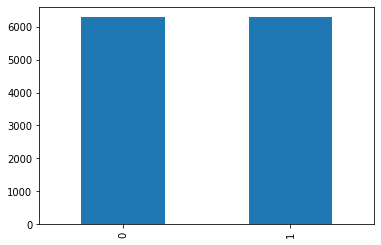

In [51]:
texts['Spam'].value_counts().plot(kind='bar') # Spam 비율

In [52]:
print('정상 메일과 스팸 메일의 개수')
print(texts.groupby('Spam').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
   Spam  count
0     0   6280
1     1   6279


In [53]:
print(f'정상 메일의 비율 = {round(texts["Spam"].value_counts()/len(texts) * 100, 3)}%') # Spam 비율
print(f'스팸 메일의 비율 = {round(texts["Spam"].value_counts()/len(texts) * 100, 3)}%')

정상 메일의 비율 = 0    50.004
1    49.996
Name: Spam, dtype: float64%
스팸 메일의 비율 = 0    50.004
1    49.996
Name: Spam, dtype: float64%


In [54]:
X_data = texts['Text'] # Text 저장
y_data = texts['Spam'] # Label 저장
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 12559
레이블의 개수: 12559


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data) # 데이터를 Train , Test 용으로 분리.

In [57]:
print('-------훈련 데이터의 비율-------')
print(f'정상 메일 = {round(y_train.value_counts()/len(y_train) * 100, 3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100, 3)}%')

-------훈련 데이터의 비율-------
정상 메일 = 0    50.005
1    49.995
Name: Spam, dtype: float64%
스팸 메일 = 49.995%


In [58]:
print('-------테스트 데이터의 비율-------')
print(f'정상 메일 = {round(y_test.value_counts()/len(y_test) * 100, 3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100, 3)}%')

-------테스트 데이터의 비율-------
정상 메일 = 1    50.0
0    50.0
Name: Spam, dtype: float64%
스팸 메일 = 50.0%


In [59]:
# 단어 분리기 모듈 설치
!pip install soynlp

from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 28.9 MB/s 


In [60]:
word_extractor = WordExtractor()
word_extractor.train(X_train) # Train 그룹의 Text 를 단어로 분리하기 위한 훈련
word_score_table = word_extractor.extract()

training was done. used memory 0.860 Gb
all cohesion probabilities was computed. # words = 20118
all branching entropies was computed # words = 39203
all accessor variety was computed # words = 39203


In [61]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[14600, 14601, 59], [1, 14602, 8361, 44, 14603], [4718, 14604, 14605, 14606, 865, 14607, 14608], [14609, 8362, 14610, 8363, 184, 2326, 21, 14611, 1479, 14612, 1690, 14613, 1340], [14614, 5962, 14615, 14616, 76, 8364, 14617]]


In [62]:
word_to_index = tokenizer.word_index # 숫자로 index 화
print(word_to_index)

{'광고': 1, 'web발신': 2, '및': 3, '이름': 4, '바랍니다': 5, '2': 6, '나': 7, '있습니다': 8, '1': 9, '아': 10, '근데': 11, '가능': 12, '상품': 13, '무료거부': 14, '사진': 15, '아래': 16, '진짜': 17, '시스템': 18, '등': 19, '본': 20, '더': 21, '00': 22, '최대': 23, '한도': 24, '오늘': 25, '5': 26, '또는': 27, '지금': 28, '안녕하세요': 29, '8': 30, '3': 31, '무조건': 32, 'ㅋㅋㅋ': 33, '난': 34, '수': 35, '전화': 36, '2020년': 37, '거절': 38, '후': 39, '나도': 40, '9': 41, '내가': 42, '따라': 43, 'ly': 44, '항상': 45, '번호로': 46, '응': 47, 'ㅋㅋ': 48, '안내드립니다': 49, '다': 50, '수수료': 51, '그냥': 52, '너무': 53, '1번': 54, '금리': 55, '함께': 56, '7': 57, '그': 58, 'kr': 59, '이모티콘': 60, '진행': 61, '신청': 62, '18': 63, '아니': 64, '하셔서': 65, '왜': 66, '접수자가': 67, '그럼': 68, '확인': 69, 'ㅎㅎ': 70, '금전': 71, '기타': 72, '상품내용': 73, '많으니': 74, '이상': 75, 'ㅠㅠ': 76, '웅': 77, '누르시면': 78, '잘': 79, '좀': 80, 'ㅋㅋㅋㅋ': 81, 'ㅠ': 82, '대출': 83, '6': 84, 'bit': 85, '이': 86, '이제': 87, '많이': 88, '직접': 89, '기존': 90, 'hxxps': 91, '무료수신거부': 92, 'com': 93, '발생하는': 94, '한': 95, '문자수신번호로': 96, '만': 97, '통해': 98, '고객님

In [63]:
threshold = 2
total_cnt = len(word_to_index) #  단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold 보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold 보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

  # 단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합(vocabulary)에서 희귀 단어의 비율:', (rare_cnt / total_cnt) * 100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:', (rare_freq / total_freq) * 100)

등장 빈도가 1번 이하인 희귀 단어의 수: 47602
단어 집합(vocabulary)에서 희귀 단어의 비율: 76.5293162489349
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 24.938311705321173


In [64]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size))) # 정리한 후의 단어 종류 갯수

단어 집합의 크기: 62202


메일의 최대 길이 : 285
메일의 평균 길이 : 18.998607


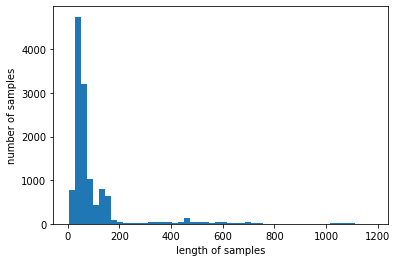

In [65]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [66]:
max_len = 25 # Text의 최대 길이
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print('훈련 데이터의 크기 (shape):', X_train_padded.shape)

훈련 데이터의 크기 (shape): (10047, 25)


In [71]:
# 훈련 model 생성 및 훈련
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
126/126 [==============================] - 5s 18ms/step - loss: 0.4004 - acc: 0.8173 - val_loss: 0.1962 - val_acc: 0.9219
Epoch 2/10
126/126 [==============================] - 2s 19ms/step - loss: 0.1087 - acc: 0.9607 - val_loss: 0.0892 - val_acc: 0.9652
Epoch 3/10
126/126 [==============================] - 2s 19ms/step - loss: 0.0388 - acc: 0.9874 - val_loss: 0.0676 - val_acc: 0.9706
Epoch 4/10
126/126 [==============================] - 2s 18ms/step - loss: 0.0157 - acc: 0.9961 - val_loss: 0.0851 - val_acc: 0.9612
Epoch 5/10
126/126 [==============================] - 2s 17ms/step - loss: 0.0056 - acc: 0.9986 - val_loss: 0.0924 - val_acc: 0.9637
Epoch 6/10
126/126 [==============================] - 2s 19ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.0852 - val_acc: 0.9692
Epoch 7/10
126/126 [==============================] - 2s 19ms/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.1364 - val_acc: 0.9557
Epoch 8/10
126/126 [==============================] - 2s 19ms/step - 

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          1990464   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,992,577
Trainable params: 1,992,577
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Test 데이터로 확인
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

79/79 [==============================] - 0s 3ms/step - loss: 0.1773 - acc: 0.9554

 테스트 정확도: 0.9554


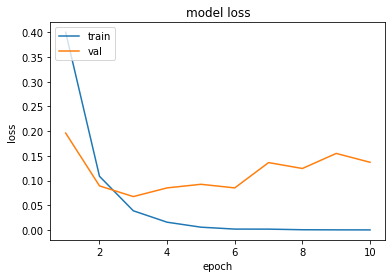

In [74]:
# 그래프로 설명
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()